In [3]:
from datetime import datetime
from pandas_datareader import data
import pandas as pd
import numpy as np
import warnings 
 
warnings.filterwarnings('ignore')

# import Momentum, P/B and MarketCap data
Momentum = pd.read_csv('mom_sig_raw_year.csv',index_col = 0)
PriceToBook = pd.read_csv("PB ratio.csv",index_col = 0)
MarketCap = pd.read_csv("MarketCap.csv",index_col = 0)
#MarketCap = MarketCap.applymap(lambda x: str(x).replace(',',''))
#MarketCap=MarketCap.astype(float)

# Data Preparation

In [4]:
Prices = pd.read_csv('adj_close_2.csv',index_col = 0,parse_dates = True)
Returns = Prices.pct_change()
# Returns.index = pd.to_datetime(Returns.index).strftime('%Y-%m-%d')

In [5]:
# Returns.index = pd.to_datetime(Returns.index)
jump_stocks=Returns[Returns>1].dropna(axis=1,how='all')
jump_stocks.dropna(axis=0,how='all')

,APHA.TO,AUP.TO,WEED.TO,ELD.TO,EQX.TO,FSV.TO,KL.TO,OSK.TO
Date,,,,,,,,
2013-10-23,NaN,49.000001,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-04,NaN,NaN,50.799997,NaN,NaN,NaN,NaN,NaN
2014-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.285714
2014-12-08,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-02,NaN,NaN,NaN,NaN,NaN,1.045307,NaN,NaN
2015-07-14,NaN,NaN,NaN,NaN,NaN,NaN,3.285714,NaN
2016-10-07,NaN,NaN,NaN,NaN,5.6875,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,4.194805,NaN,NaN,NaN,NaN


Drop 'AUP.TO', 'WEED.TO' as their prices jump at some times

In [6]:
Prices = Prices.drop(columns=['AUP.TO', 'WEED.TO'])
Returns = Returns.drop(columns=['AUP.TO', 'WEED.TO'])
MarketCap = MarketCap.drop(columns=['AUP.TO', 'WEED.TO'])
PriceToBook = PriceToBook.drop(columns=['AUP.TO', 'WEED.TO'])
Momentum = Momentum.drop(columns=['AUP.TO', 'WEED.TO'])

In [7]:
#Calculate the percentile for each factor to construct different portfolio later
MarketCap['50th_percentile'] = MarketCap.apply(lambda x: np.nanpercentile(x, 50),axis=1)

PriceToBook['30th_percentile'] = PriceToBook.apply(lambda x: np.nanpercentile(x, 30),axis=1)
PriceToBook['70th_percentile'] = PriceToBook.apply(lambda x: np.nanpercentile(x, 70),axis=1)

Momentum['50th_percentile'] = Momentum.apply(lambda x: np.nanpercentile(x, 50),axis=1)

Classify stocks based on the percentile for each factor

In [8]:
#Construct Portfolio according to MarketCap factor
Dates=list(MarketCap.index)
big_dic={}
small_dic={}
for j in range(len(Dates)):
    bls=MarketCap.iloc[j].T>=MarketCap.iloc[j,-1]
    bls=bls[:-1]
    stock_name=list(bls.index)
    big=[]
    for i in range(len(bls)):
        if bls[i] == True:
            big.append(stock_name[i])
    big_dic[str(Dates[j])]=big
    
    
for j in range(len(Dates)):
    sls=MarketCap.iloc[j].T<=MarketCap.iloc[j,-1]
    sls=sls[:-1]
    stock_name=list(sls.index)
    small=[]
    for i in range(len(sls)):
        if sls[i] == True:
            small.append(stock_name[i])
    small_dic[str(Dates[j])]=small       

In [9]:
# Need Book/Market which is the inverse of P/B
# Construct Portfolio according to B/P factor
Dates=list(PriceToBook.index)
high_dic={}
medium_dic={}
low_dic={}
for j in range(len(Dates)):
    hls=PriceToBook.iloc[j].T<PriceToBook.iloc[j,-2]
    hls=hls[:-2]
    stock_name=list(hls.index)
    high=[]
    for i in range(len(hls)):
        if hls[i] == True:
            high.append(stock_name[i])
    high_dic[str(Dates[j])]=high
    
    
for j in range(len(Dates)):
    lls=PriceToBook.iloc[j].T>=PriceToBook.iloc[j,-1]
    lls=lls[:-2]
    stock_name=list(lls.index)
    low=[]
    for i in range(len(lls)):
        if lls[i] == True:
            low.append(stock_name[i])
    low_dic[str(Dates[j])]=low 
    
for j in range(len(Dates)):
    mls=(PriceToBook.iloc[j,-2]<=PriceToBook.iloc[j].T) & (PriceToBook.iloc[j].T<PriceToBook.iloc[j,-1])
    mls=mls[:-2]
    stock_name=list(mls.index)
    medium=[]
    for i in range(len(mls)):
        if mls[i] == True:
            medium.append(stock_name[i])
    medium_dic[str(Dates[j])]=medium


In [10]:
# Construct Portfolio according to Momentum factor
Dates=list(Momentum.index)
up_dic={}
down_dic={}
for j in range(len(Dates)):
    uls=Momentum.iloc[j].T>Momentum.iloc[j,-1]
    uls=uls[:-1]
    stock_name=list(uls.index)
    up=[]
    for i in range(len(uls)):
        if uls[i] == True:
            up.append(stock_name[i])
    up_dic[str(Dates[j])]=up
    
    
for j in range(len(Dates)):
    dls=Momentum.iloc[j].T<=Momentum.iloc[j,-1]
    dls=dls[:-1]
    stock_name=list(dls.index)
    down=[]
    for i in range(len(dls)):
        if dls[i] == True:
            down.append(stock_name[i])
    down_dic[str(Dates[j])]=down 

In [11]:
BHU_dic = {}
BMU_dic = {}
BLU_dic = {}
SHU_dic = {}
SMU_dic = {}
SLU_dic = {}
BHD_dic = {}
BMD_dic = {}
BLD_dic = {}
SHD_dic = {}
SMD_dic = {}
SLD_dic = {}
for key in big_dic.keys():
    BHU = []
    BHD = []
    BHU = set(big_dic[key]).intersection(high_dic[key],up_dic[key])
    BHD = set(big_dic[key]).intersection(high_dic[key],down_dic[key])
    BHU_dic[str(key)] = BHU
    BHD_dic[str(key)] = BHD
for key in big_dic.keys():
    BMU = []
    BMD = []
    BMU = set(big_dic[key]).intersection(medium_dic[key],up_dic[key])
    BMD = set(big_dic[key]).intersection(medium_dic[key],down_dic[key])
    BMU_dic[str(key)] = BMU
    BMD_dic[str(key)] = BMD
for key in big_dic.keys():
    BLU = []
    BLD = []
    BLU = set(big_dic[key]).intersection(low_dic[key],up_dic[key])
    BLD = set(big_dic[key]).intersection(low_dic[key],down_dic[key])
    BLU_dic[str(key)] = BLU
    BLD_dic[str(key)] = BLD
for key in small_dic.keys():
    SHU = []
    SHD = []
    SHU = set(small_dic[key]).intersection(high_dic[key],up_dic[key])
    SHD = set(small_dic[key]).intersection(high_dic[key],down_dic[key])
    SHU_dic[str(key)] = SHU
    SHD_dic[str(key)] = SHD
for key in small_dic.keys():
    SMU = []
    SMD = []
    SMU = set(small_dic[key]).intersection(medium_dic[key],up_dic[key])
    SMD = set(small_dic[key]).intersection(medium_dic[key],down_dic[key])
    SMU_dic[str(key)] = SMU
    SMD_dic[str(key)] = SMD
for key in small_dic.keys():
    SLU = []
    SLD = []
    SLU = set(small_dic[key]).intersection(low_dic[key],up_dic[key])
    SLD = set(small_dic[key]).intersection(low_dic[key],down_dic[key])
    SLU_dic[str(key)] = SLU
    SLD_dic[str(key)] = SLD
#BH_dic,BM_dic,BL_dic,SH_dic,SM_dic,SL_dic

Calculate MR factor

In [12]:
MR_raw = pd.read_csv('mr_raw.csv',index_col = 0,parse_dates = True)
df = pd.read_csv("adj_close_2.csv",index_col = 0,parse_dates = True)
MR_raw = MR_raw.drop(columns=['AUP.TO', 'WEED.TO'])

In [13]:
df_rtn = df.pct_change()

In [14]:
#construct MR factor for each portfolio
pf_list = [BHU_dic,BMU_dic,BLU_dic,SHU_dic,SMU_dic,SLU_dic,BHD_dic,BMD_dic,BLD_dic,SHD_dic,SMD_dic,SLD_dic]
MR_factor =pd.DataFrame()
for i in range(12) :
    pf_dic = pf_list[i]
    mr_factor = pd.Series()
    for y in range(2013,2020):
        pf = pf_dic[str(y-1)]
        mr = MR_raw.loc[(MR_raw.index.year == y)][pf]
        df_rtn_temp = df_rtn.loc[(df_rtn.index.year==y)][pf]
        mr_sig_mean = mr.mean(axis = 1)
        mr_sig_std = mr.std(axis=1)
        mr_sig_norm = mr.sub(mr_sig_mean,axis=0).div(mr_sig_std,axis=0)
        temp = (mr_sig_norm.div(mr_sig_norm.shape[1]-1)*df_rtn_temp).sum(axis=1)
        mr_factor = mr_factor.append(temp)       
    MR_factor[i] = mr_factor
MR_factor.columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD']

MR_factor.head()


,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD
2013-01-02,-0.002269,0.011357,-0.001318,0.000114,-0.001568,0.004019,-0.007268,0.002102,0.005833,0.002757,-0.005949,-0.011859
2013-01-03,0.008906,0.007266,0.009761,0.010398,0.010689,0.009724,0.009623,0.003223,0.000989,-0.003745,0.002755,0.003429
2013-01-04,-0.000846,-0.001553,-0.002026,0.003640,0.000176,0.011335,-0.007415,0.002670,0.001200,-0.003542,0.001185,-0.008551
2013-01-07,0.000338,-0.006967,0.000724,0.006549,-0.005937,0.052388,0.001414,-0.002418,-0.000977,-0.003844,-0.007434,-0.002821
2013-01-08,-0.004012,0.007654,-0.003780,0.002913,-0.002665,-0.002400,0.006506,-0.000464,-0.001046,0.010060,0.004771,0.006663


Calculate market excess return and risk free rate

In [15]:
from pandas import DataFrame
Index_PriceAndReturn = pd.read_csv('Index with Returns.csv',index_col = 0,parse_dates = True)
#Index_PriceAndReturn.index=pd.to_datetime(Index_PriceAndReturn.index,format='%Y-%m-%d')
Index_Return = Index_PriceAndReturn['Daily Returns']
Index_Price = Index_PriceAndReturn['Adj Close']

Tenyr_Bond_Price = pd.read_csv("Canada 10-Year Bond Yield Historical Data.csv",index_col = 0,parse_dates = True)
Tenyr_Bond_Price = Tenyr_Bond_Price['Price']
#Tenyr_Bond_Price.index = pd.to_datetime(Tenyr_Bond_Price.index).strftime('%Y-%m-%d')
RiskFreeRate = DataFrame(np.log(Tenyr_Bond_Price.sort_index()).diff())
RiskFreeRate.columns  = ['RiskFreeRate']

#Index_Return.index = pd.to_datetime(Index_Return.index).strftime('%Y-%m-%d')
IndexAndRfReturn = pd.concat([Index_Return,RiskFreeRate],axis = 1,join = 'inner')
market_excess_return = DataFrame(IndexAndRfReturn['Daily Returns'].sub(IndexAndRfReturn['RiskFreeRate']))
market_excess_return.columns = ['MarketExcessReturn']

Weighted return function

In [16]:
def weighted_excess_return(pf_dic):
    '''
    input: pf_dic dictionary type, ex: BH_dic
    output: 
    '''
    Portfolio_Return = pd.DataFrame()
    for x in range(len(MarketCap.index)-1):
        pf_comp = pf_dic[str(MarketCap.index[x])]
        mkcap = MarketCap.loc[MarketCap.index[x],pf_comp]
        weightedAvg = Returns.loc[(Returns.index.year == MarketCap.index[x+1])][pf_comp].mul(mkcap/mkcap.sum().sum(),axis=1).sum(axis=1)
        Portfolio_Return = pd.concat([Portfolio_Return,weightedAvg],axis = 0)
    Portfolio_Return.columns = ["Weighted_Portfolio_Return"]
   # Portfolio_Return.index = pd.to_datetime(Portfolio_Return.index).strftime('%Y-%m-%d')
    PortfolioAndRfReturn = pd.concat([Portfolio_Return,RiskFreeRate],axis = 1,join = 'inner')
    weighted_excess_return = DataFrame(PortfolioAndRfReturn['Weighted_Portfolio_Return'].sub(PortfolioAndRfReturn['RiskFreeRate'],axis = 0))
    weighted_excess_return.columns = ['pf_weighted_excess_return']
    return(weighted_excess_return)


In [17]:
SMB = weighted_excess_return(small_dic)-weighted_excess_return(big_dic)
HML = weighted_excess_return(high_dic)-weighted_excess_return(low_dic)
UMD = weighted_excess_return(up_dic)-weighted_excess_return(down_dic)
SMB.columns = ['SMB']
HML.columns = ['HML']
UMD.columns = ['UMD']

Plot SMB HML UMD and MR factors 

<Figure size 432x288 with 0 Axes>

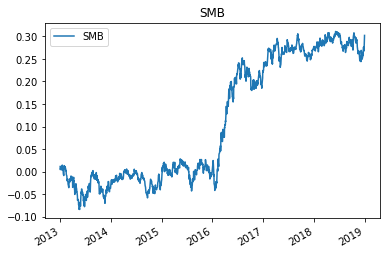

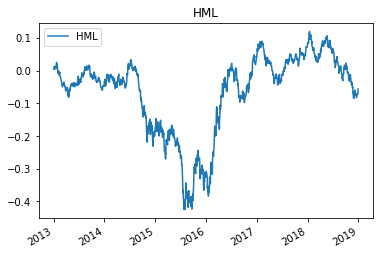

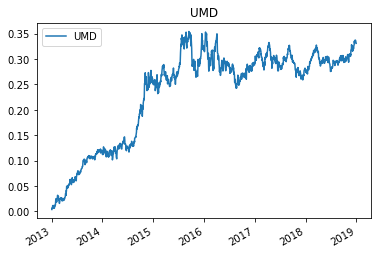

In [18]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
SMB.index = pd.to_datetime(SMB.index)
HML.index = pd.to_datetime(HML.index)
UMD.index = pd.to_datetime(UMD.index)
plt.figure(1)
SMB.cumsum().plot(title ='SMB');
plt.figure(2)
HML.cumsum().plot(title ='HML');
plt.figure(3)
UMD.cumsum().plot(title ='UMD');

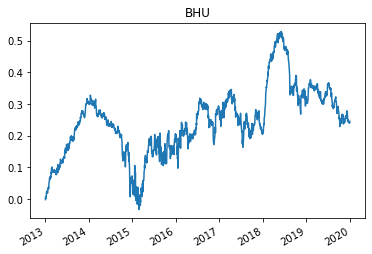

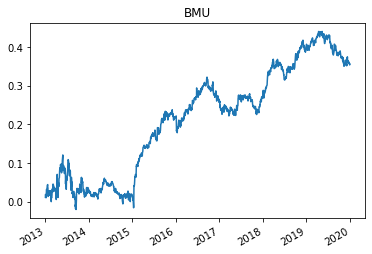

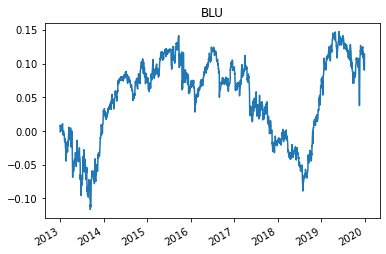

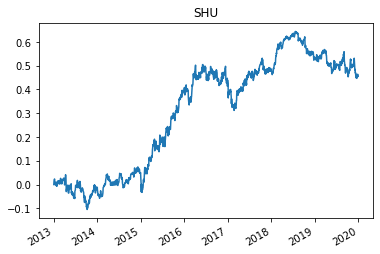

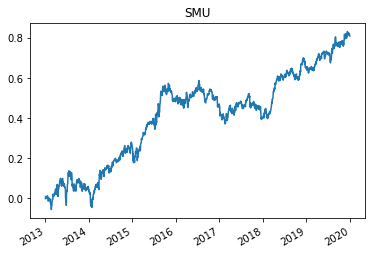

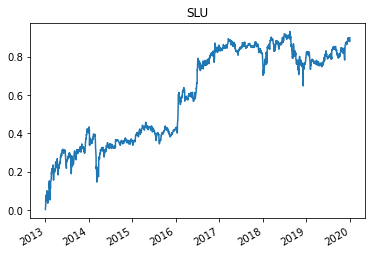

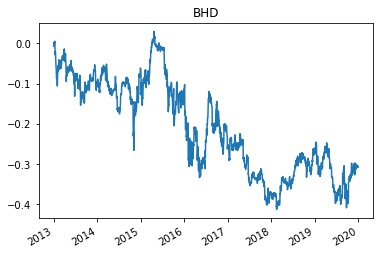

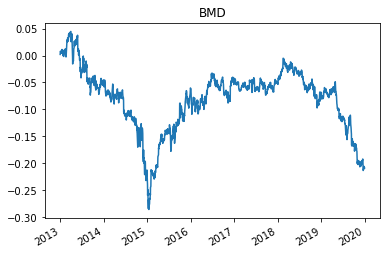

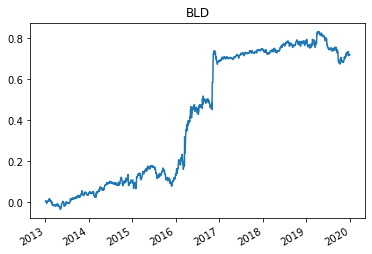

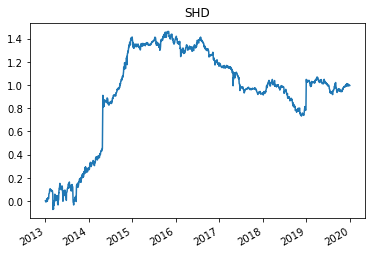

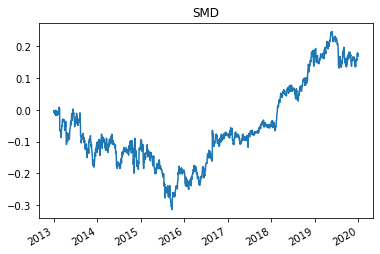

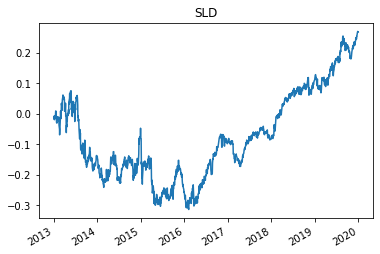

In [19]:
# mean reversion factor for each portfolio
MR_factor.index = pd.to_datetime(MR_factor.index)
for i in range(12):
    plt.figure(i)
    MR_factor.iloc[:,i].cumsum().plot(title=MR_factor.columns[i])

# 5-factors model

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
def reg5(pf_dic,pf):
    all_data = pd.concat([weighted_excess_return(pf_dic),market_excess_return,SMB,HML,UMD,MR_factor[pf]],axis = 1, join = 'inner')
    all_data.columns = ['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD','MR_pf']
    model = sm.formula.ols(formula = "pf_weighted_excess_return ~ MarketExcessReturn + SMB + HML +UMD + MR_pf", data = all_data[['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD','MR_pf']]).fit()  
    return(DataFrame(model.params))
    
def reg5_summary(pf_dic,pf):
    all_data = pd.concat([weighted_excess_return(pf_dic),market_excess_return,SMB,HML,UMD,MR_factor[pf]],axis = 1, join = 'inner')
    all_data.columns = ['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD','MR_pf']
    model = sm.formula.ols(formula = "pf_weighted_excess_return ~ MarketExcessReturn + SMB + HML +UMD+MR_pf", 
                           data = all_data[['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD','MR_pf']]).fit()  
    return(model)
    

#### Estimated Coefficient for each portfolio

In [21]:
pf_list = [BHU_dic,BMU_dic,BLU_dic,SHU_dic,SMU_dic,SLU_dic,BHD_dic,BMD_dic,BLD_dic,SHD_dic,SMD_dic,SLD_dic]
#MR_factor.index = pd.to_datetime(MR_factor.index).strftime('%Y-%m-%d')
BetaEstimate = pd.DataFrame()
columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD']
for i in range(len(columns)):
    pf = columns[i]
    pf_dic = pf_list[i]
    BetaEstimate = pd.concat([BetaEstimate,reg5(pf_dic,pf)],axis = 1)
BetaEstimate.columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD']
#pd.set_option('display.float_format', '{:.11g}'.format)
BetaEstimate

,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD
Intercept,0.000298,0.000172,0.000253,0.000207,0.000057,0.000202,0.000253,0.000230,0.000252,0.000265,0.000275,0.000113
MarketExcessReturn,0.986886,0.990798,1.019977,1.042248,1.013391,0.991965,1.025814,0.990358,1.004969,1.007125,0.964103,0.978928
SMB,-0.059767,-0.124343,0.030646,1.170450,0.864028,0.753955,0.137654,-0.190743,0.155882,1.117481,0.600066,0.603229
HML,0.603109,0.052700,-0.292389,0.069978,0.071171,-0.293699,0.607023,0.057100,-0.761583,0.206914,-0.092724,-0.290436
UMD,1.049286,0.405378,0.380422,0.262427,0.503367,0.181024,-0.594289,-0.326807,-0.998120,-0.473128,-0.443643,-0.047317
MR_pf,-0.034161,0.001418,0.052464,-0.026274,0.038693,0.019129,0.042257,0.035740,-0.046344,0.071031,0.002181,0.020127


### Sharpe ratio 

In [22]:
#     (mean,std_dev) of each pf and factor return
pf_stat = pd.DataFrame()   
for x in pf_list:
     stat = weighted_excess_return(x).describe().loc[['mean','std']]
     pf_stat = pd.concat([pf_stat,stat],axis = 1)
HML_stat = HML.describe().loc[['mean','std']]
SMB_stat = SMB.describe().loc[['mean','std']]
UMD_stat = UMD.describe().loc[['mean','std']]
mrk_excess_rtn = market_excess_return.describe().loc[['mean','std']]
pf_stat = pd.concat([pf_stat,mrk_excess_rtn,SMB_stat,HML_stat,UMD_stat],axis = 1)
pf_stat.columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD','Rm-Rf','SMB','HML','UMD']
#pf_stat

annual_pf_stat = pf_stat.mul([252,np.sqrt(252)],axis=0)
annual_pf_stat.loc['sp_ratio']= annual_pf_stat.loc['mean'].div(annual_pf_stat.loc['std'])
annual_pf_stat

,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD,Rm-Rf,SMB,HML,UMD
mean,0.171784,0.108403,0.140601,0.174790,0.140093,0.153867,0.080916,0.078431,0.067145,0.157878,0.123920,0.108186,0.143184,0.050727,-0.009455,0.055558
std,0.405747,0.369127,0.387412,0.437268,0.414537,0.393166,0.408528,0.365986,0.393032,0.425537,0.382655,0.387203,0.463176,0.092477,0.140286,0.078581
sp_ratio,0.423376,0.293674,0.362925,0.399732,0.337952,0.391353,0.198066,0.214300,0.170838,0.371009,0.323844,0.279405,0.309134,0.548533,-0.067397,0.707018


In [23]:
#sharpe ratio of MR factor for each portfolio
MR_Annual_SR =MR_factor.describe().loc[['mean','std']].mul([252,np.sqrt(252)],axis=0)
MR_Annual_SR.loc['sp_ratio of MR']= MR_Annual_SR.loc['mean'].div(MR_Annual_SR.loc['std'])
MR_Annual_SR

,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD
mean,0.035174,0.051019,0.016358,0.065286,0.116077,0.128824,-0.044020,-0.030018,0.103019,0.142956,0.024869,0.038323
std,0.167520,0.084493,0.098768,0.132948,0.146922,0.195223,0.167984,0.081964,0.117753,0.276472,0.136453,0.145112
sp_ratio of MR,0.209970,0.603830,0.165618,0.491065,0.790060,0.659884,-0.262051,-0.366230,0.874873,0.517071,0.182253,0.264095


In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Correlation of different factors

In [25]:
for i in range(len(columns)):
    pf = columns[i]
    fd_factors = pd.concat([market_excess_return,SMB,HML,UMD,MR_factor[pf]],axis = 1)
    fd_factors.columns = ['MarketExcessReturn', 'SMB', 'HML', 'UMD', 'MR']
    pf
    fd_factors.corr()

'BHU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.007738
SMB,0.190430,1.000000,0.445689,-0.094368,-0.025482
HML,0.029185,0.445689,1.000000,-0.472017,0.011440
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.068128
MR,-0.007738,-0.025482,0.011440,-0.068128,1.000000


'BMU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,0.017507
SMB,0.190430,1.000000,0.445689,-0.094368,0.024411
HML,0.029185,0.445689,1.000000,-0.472017,-0.023432
UMD,0.027656,-0.094368,-0.472017,1.000000,0.015297
MR,0.017507,0.024411,-0.023432,0.015297,1.000000


'BLU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,0.010945
SMB,0.190430,1.000000,0.445689,-0.094368,0.029783
HML,0.029185,0.445689,1.000000,-0.472017,-0.016231
UMD,0.027656,-0.094368,-0.472017,1.000000,0.022783
MR,0.010945,0.029783,-0.016231,0.022783,1.000000


'SHU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.018755
SMB,0.190430,1.000000,0.445689,-0.094368,-0.075257
HML,0.029185,0.445689,1.000000,-0.472017,-0.053952
UMD,0.027656,-0.094368,-0.472017,1.000000,0.000325
MR,-0.018755,-0.075257,-0.053952,0.000325,1.000000


'SMU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,0.032015
SMB,0.190430,1.000000,0.445689,-0.094368,0.047966
HML,0.029185,0.445689,1.000000,-0.472017,-0.000871
UMD,0.027656,-0.094368,-0.472017,1.000000,0.005987
MR,0.032015,0.047966,-0.000871,0.005987,1.000000


'SLU'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,0.004672
SMB,0.190430,1.000000,0.445689,-0.094368,0.077716
HML,0.029185,0.445689,1.000000,-0.472017,0.021012
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.011939
MR,0.004672,0.077716,0.021012,-0.011939,1.000000


'BHD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,0.004925
SMB,0.190430,1.000000,0.445689,-0.094368,-0.023977
HML,0.029185,0.445689,1.000000,-0.472017,-0.030822
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.008799
MR,0.004925,-0.023977,-0.030822,-0.008799,1.000000


'BMD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.009805
SMB,0.190430,1.000000,0.445689,-0.094368,-0.010591
HML,0.029185,0.445689,1.000000,-0.472017,-0.006338
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.004589
MR,-0.009805,-0.010591,-0.006338,-0.004589,1.000000


'BLD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.044307
SMB,0.190430,1.000000,0.445689,-0.094368,0.009004
HML,0.029185,0.445689,1.000000,-0.472017,0.004992
UMD,0.027656,-0.094368,-0.472017,1.000000,0.048029
MR,-0.044307,0.009004,0.004992,0.048029,1.000000


'SHD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.000949
SMB,0.190430,1.000000,0.445689,-0.094368,0.056989
HML,0.029185,0.445689,1.000000,-0.472017,0.010785
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.009100
MR,-0.000949,0.056989,0.010785,-0.009100,1.000000


'SMD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.013794
SMB,0.190430,1.000000,0.445689,-0.094368,-0.017796
HML,0.029185,0.445689,1.000000,-0.472017,0.012196
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.024196
MR,-0.013794,-0.017796,0.012196,-0.024196,1.000000


'SLD'

,MarketExcessReturn,SMB,HML,UMD,MR
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656,-0.019807
SMB,0.190430,1.000000,0.445689,-0.094368,0.026869
HML,0.029185,0.445689,1.000000,-0.472017,0.007093
UMD,0.027656,-0.094368,-0.472017,1.000000,-0.027309
MR,-0.019807,0.026869,0.007093,-0.027309,1.000000


### Regression Result
Mean Reversion factor is not significant in BHU BMU SHU SMD SLD under 5% significant level ;
Size factor (SMB) is not significant in BHU BLU under 5% significant level ;
Momentum factor (UMD) is not significant in SLD under 5% significant level ;

In [26]:
for i in range(len(columns)):
    pf = columns[i]
    pf_dic = pf_list[i]
    print(pf,reg5_summary(pf_dic,pf).summary())

BHU                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.870
Model:                                   OLS   Adj. R-squared:                  0.870
Method:                        Least Squares   F-statistic:                     2001.
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:42   Log-Likelihood:                 4905.6
No. Observations:                       1501   AIC:                            -9799.
Df Residuals:                           1495   BIC:                            -9767.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

SLU                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.961
Model:                                   OLS   Adj. R-squared:                  0.961
Method:                        Least Squares   F-statistic:                     7376.
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:42   Log-Likelihood:                 5857.3
No. Observations:                       1501   AIC:                        -1.170e+04
Df Residuals:                           1495   BIC:                        -1.167e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

SLD                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.938
Model:                                   OLS   Adj. R-squared:                  0.938
Method:                        Least Squares   F-statistic:                     4522.
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:43   Log-Likelihood:                 5531.2
No. Observations:                       1501   AIC:                        -1.105e+04
Df Residuals:                           1495   BIC:                        -1.102e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [27]:
for i in range(len(columns)):
    pf = columns[i]
    pf_dic = pf_list[i]
    print(reg5_summary(pf_dic,pf).rsquared.round(4))
#R-squared values are very close to 1
#indicates that three factors can explain most part of the variation on excess return for each portfolio   

0.87
0.9878
0.9749
0.9309
0.9376
0.961
0.9665
0.9895
0.9406
0.9464
0.9398
0.938


# 4-factors model

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
def reg4(pf_dic):
    all_data = pd.concat([weighted_excess_return(pf_dic),market_excess_return,SMB,HML,UMD],axis = 1, join = 'inner')
    model = sm.formula.ols(formula = "pf_weighted_excess_return ~ MarketExcessReturn + SMB + HML +UMD", data = all_data[['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD']]).fit()  
    return(DataFrame(model.params))
    
def reg4_summary(pf_dic):
    all_data = pd.concat([weighted_excess_return(pf_dic),market_excess_return,SMB,HML,UMD],axis = 1, join = 'inner')
    model = sm.formula.ols(formula = "pf_weighted_excess_return ~ MarketExcessReturn + SMB + HML +UMD", data = all_data[['pf_weighted_excess_return','MarketExcessReturn','SMB','HML','UMD']]).fit()  
    return(model)
    

#### Estimated Coefficient for each portfolio

In [29]:
pf_list = [BHU_dic,BMU_dic,BLU_dic,SHU_dic,SMU_dic,SLU_dic,BHD_dic,BMD_dic,BLD_dic,SHD_dic,SMD_dic,SLD_dic]
BetaEstimate = pd.DataFrame()
for pf_dic in pf_list:
    BetaEstimate = pd.concat([BetaEstimate,reg4(pf_dic)],axis = 1)
BetaEstimate.columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD']
#pd.set_option('display.float_format', '{:.11g}'.format)
BetaEstimate

,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD
Intercept,0.000289,0.000173,0.000255,0.000197,0.000073,0.000212,0.000246,0.000229,0.000229,0.000313,0.000275,0.000115
MarketExcessReturn,0.986758,0.990805,1.020130,1.042261,1.013848,0.991979,1.025994,0.990427,1.005415,1.006152,0.964091,0.978776
SMB,-0.057892,-0.124290,0.032957,1.172746,0.867445,0.757623,0.136824,-0.191077,0.155549,1.133562,0.599990,0.604493
HML,0.603634,0.052663,-0.293454,0.070935,0.070047,-0.294401,0.604964,0.056970,-0.762956,0.202827,-0.092694,-0.291004
UMD,1.055179,0.405375,0.381240,0.263471,0.503184,0.180248,-0.596948,-0.327137,-1.002798,-0.477082,-0.443719,-0.048681


### Sharpe ratio 

In [30]:
#     (mean,std_dev) of each pf and factor return
pf_stat = pd.DataFrame()   
for x in pf_list:
     stat = weighted_excess_return(x).describe().loc[['mean','std']]
     pf_stat = pd.concat([pf_stat,stat],axis = 1)
HML_stat = HML.describe().loc[['mean','std']]
SMB_stat = SMB.describe().loc[['mean','std']]
UMD_stat = UMD.describe().loc[['mean','std']]
mrk_excess_rtn = market_excess_return.describe().loc[['mean','std']]
pf_stat = pd.concat([pf_stat,mrk_excess_rtn,SMB_stat,HML_stat,UMD_stat],axis = 1)
pf_stat.columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD','Rm-Rf','SMB','HML','UMD']
#pf_stat

annual_pf_stat = pf_stat.mul([252,np.sqrt(252)],axis=0)
annual_pf_stat.loc['sp_ratio']= annual_pf_stat.loc['mean'].div(annual_pf_stat.loc['std'])
annual_pf_stat

,BHU,BMU,BLU,SHU,SMU,SLU,BHD,BMD,BLD,SHD,SMD,SLD,Rm-Rf,SMB,HML,UMD
mean,0.171784,0.108403,0.140601,0.174790,0.140093,0.153867,0.080916,0.078431,0.067145,0.157878,0.123920,0.108186,0.143184,0.050727,-0.009455,0.055558
std,0.405747,0.369127,0.387412,0.437268,0.414537,0.393166,0.408528,0.365986,0.393032,0.425537,0.382655,0.387203,0.463176,0.092477,0.140286,0.078581
sp_ratio,0.423376,0.293674,0.362925,0.399732,0.337952,0.391353,0.198066,0.214300,0.170838,0.371009,0.323844,0.279405,0.309134,0.548533,-0.067397,0.707018


### Correlation of different factors

In [31]:
fd_factors = pd.concat([market_excess_return,SMB,HML,UMD],axis = 1)
fd_factors.corr()

,MarketExcessReturn,SMB,HML,UMD
MarketExcessReturn,1.000000,0.190430,0.029185,0.027656
SMB,0.190430,1.000000,0.445689,-0.094368
HML,0.029185,0.445689,1.000000,-0.472017
UMD,0.027656,-0.094368,-0.472017,1.000000


### Regression Result
Size factor (SMB) is not significant in BHU BLU under 5% significant level ;
Momentum factor (UMD) is not significant in SLD under 5% significant level ;

In [32]:
pf_list = [BHU_dic,BMU_dic,BLU_dic,SHU_dic,SMU_dic,SLU_dic,BHD_dic,BMD_dic,BLD_dic,SHD_dic,SMD_dic,SLD_dic]
columns = ['BHU','BMU','BLU','SHU','SMU','SLU','BHD','BMD','BLD','SHD','SMD','SLD']
for i in range(len(columns)):
    pf = columns[i]
    pf_dic = pf_list[i]
    print(pf,reg4_summary(pf_dic).summary())

BHU                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.870
Model:                                   OLS   Adj. R-squared:                  0.869
Method:                        Least Squares   F-statistic:                     2498.
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:45   Log-Likelihood:                 4904.3
No. Observations:                       1501   AIC:                            -9799.
Df Residuals:                           1496   BIC:                            -9772.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

BHD                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.966
Model:                                   OLS   Adj. R-squared:                  0.966
Method:                        Least Squares   F-statistic:                 1.070e+04
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:45   Log-Likelihood:                 5907.1
No. Observations:                       1501   AIC:                        -1.180e+04
Df Residuals:                           1496   BIC:                        -1.178e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

SMD                                 OLS Regression Results                               
Dep. Variable:     pf_weighted_excess_return   R-squared:                       0.940
Model:                                   OLS   Adj. R-squared:                  0.940
Method:                        Least Squares   F-statistic:                     5840.
Date:                       Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                               23:36:46   Log-Likelihood:                 5571.6
No. Observations:                       1501   AIC:                        -1.113e+04
Df Residuals:                           1496   BIC:                        -1.111e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [33]:
for x in pf_list:
    print(reg4_summary(x).rsquared.round(4))

0.8698
0.9878
0.9747
0.9308
0.9374
0.9609
0.9662
0.9894
0.9404
0.944
0.9398
0.9379


# 3-factors model 